In [1]:
import jax
jax.config.update("jax_enable_x64", True)
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp


In [2]:
from funciones import get_farfield_radiant_intensity_percos_scalar, GS_phase_retrieval

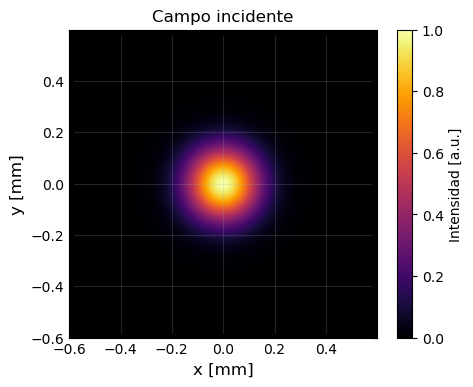

In [3]:
um = 1.0
mm = 1000

w_alpha = np.sin(np.pi/6)
n = 16
λ = 1.0*um
w_I = 200.0*um


def target_fun(fxx, fyy):
    αα, ββ = fxx*λ, fyy*λ
    sinθ = np.sqrt(αα**2 + ββ**2)
    return 92637 * np.exp(-2*(((sinθ)/w_alpha))**n) * λ**2

def input_fun(xx,yy):
    rr = np.sqrt(xx**2 + yy**2)
    E = np.exp(-(rr**2)/(w_I**2))
    return E**2


um = 1
Nx = 2048*2
Ny = 2048*2

extent_x = extent_y = 1200*um
extent_r = extent_x/2

dx = extent_x/Nx
dy = extent_y/Ny
x = dx*(np.arange(Nx)-Nx//2)
y = dy*(np.arange(Ny)-Ny//2)
xx, yy = np.meshgrid(x, y)
rr = np.sqrt(xx**2 +  yy**2)

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1,1,1)
im = ax.imshow(input_fun(xx,yy), origin = 'lower', cmap ='inferno',    extent = [xx[0,0]/mm ,xx[0,-1]/mm ,yy[0,0]/mm ,yy[-1,0]/mm ])
cb1 = fig.colorbar(im, orientation = 'vertical')
cb1.set_label('Intensidad [a.u.]')
ax.set_title(r"Campo incidente")
ax.set_xlabel("x [mm]", size= 12)
ax.set_ylabel("y [mm]", size= 12)
plt.grid(alpha =0.2)
ax.tick_params(axis='both', which="both", direction="in",right=True, top=True,)
plt.show()


In [4]:
retrieved_phase, error_list = GS_phase_retrieval(input_fun, target_fun, extent_x, extent_y, Nx, Ny,num_iter = 40)

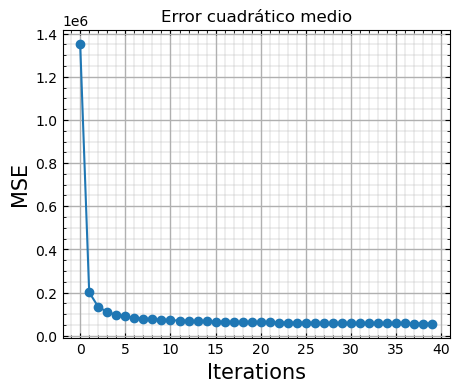

In [5]:


fig = plt.figure(figsize=(5,4
                         ))
ax = fig.add_subplot(1,1,1)  
ax.tick_params(axis='both', which="both", direction="in",right=True, top=True,)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=1.0)

ax.plot(np.array(error_list), '-o')




ax.tick_params(axis='both', which="both", direction="in",right=True, top=True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=1.0)
ax.grid(which='minor', linestyle='-', linewidth=0.3)


plt.title('Error cuadrático medio')


#ax.set_title('super gaussian at MOE 1')
ax.set_ylabel(r'MSE', size= 15)
ax.set_xlabel(r'Iterations', size= 15)
#plt.legend()
plt.show()

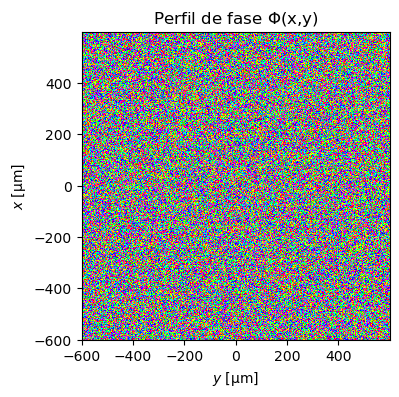

In [6]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1,1,1)
ax.imshow(retrieved_phase %(np.pi*2), cmap = 'hsv', interpolation = 'none', extent = [x[0], x[-1], y[0], y[-1]])
ax.set_ylabel("$x$ [μm]")
ax.set_xlabel('$y$ [μm]')
ax.set_title(r"Perfil de fase $\Phi$(x,y)")

plt.show()



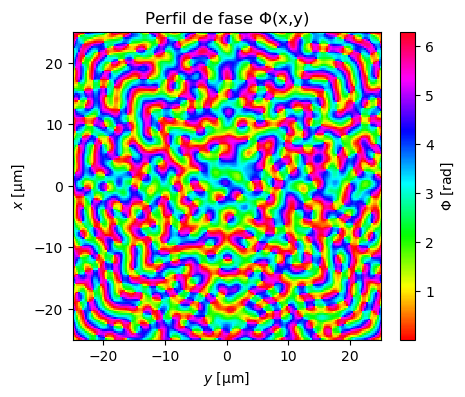

In [7]:
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1,1,1)
im = ax.imshow((retrieved_phase) %(np.pi*2), cmap = 'hsv', origin = 'lower', interpolation = 'none', extent = [x[0], x[-1], y[0], y[-1]])
cb1 = fig.colorbar(im, orientation = 'vertical',fraction=0.045, label = '$\Phi$ [rad]')

ax.set_ylabel("$x$ [μm]")
ax.set_xlabel('$y$ [μm]')
ax.set_title(r"Perfil de fase $\Phi$(x,y)")
ax.set_xlim([-25,25])
ax.set_ylim([-25,25])
plt.show()


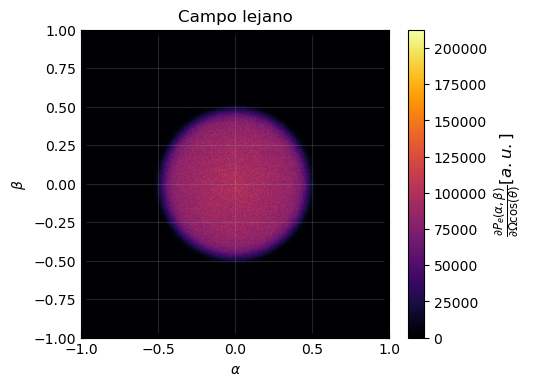

In [8]:
α, β, Irad = get_farfield_radiant_intensity_percos_scalar(x, y, np.sqrt(input_fun(xx,yy))*np.exp(1j*(retrieved_phase)), λ)

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1,1,1)
im = ax.imshow(2*np.abs(Irad), origin = 'lower', cmap ='inferno',    extent = [α[0],α[-1],β[0],β[-1]])
ax.set_xlabel('$α$')
ax.set_ylabel("$β$")
ax.set_title(r"Campo lejano")
ax.set_xlabel('$α$')
ax.set_ylabel("$β$")
plt.grid(alpha =0.2)
ax.tick_params(axis='both', which="both", direction="in",right=True, top=True,)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
cb1 = fig.colorbar(im, orientation = 'vertical')
cb1.set_label(r"$\frac{\partial P_e(α,β)}{\partial \Omega \cos(\theta)} [a.u.]$", size= 12)
plt.show()



/tmp/ipykernel_29320/3929487729.py:9: RuntimeWarning: invalid value encountered in arcsin
  ax.plot(np.arcsin(α) *180/ np.pi, Irad[Ny//2]/target.max() , label = 'perfil simulado' )
/tmp/ipykernel_29320/3929487729.py:11: RuntimeWarning: invalid value encountered in arcsin
  ax.plot(np.arcsin(α) *180/ np.pi, 0.5*target/target.max(), '--', label = 'perfil objetivo' )


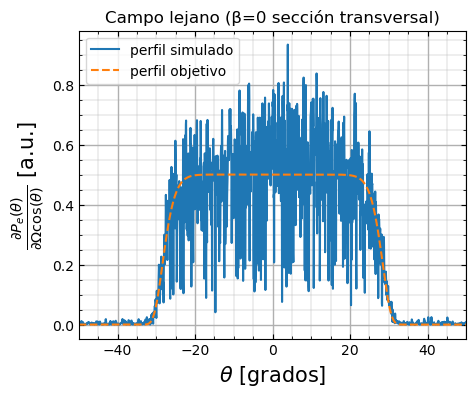

In [9]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(1,1,1)  
ax.tick_params(axis='both', which="both", direction="in",right=True, top=True,)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=1.0)

target = target_fun(α,0)

ax.plot(np.arcsin(α) *180/ np.pi, Irad[Ny//2]/target.max() , label = 'perfil simulado' )

ax.plot(np.arcsin(α) *180/ np.pi, 0.5*target/target.max(), '--', label = 'perfil objetivo' ) 
ax.set_xlim([-50, 50])



ax.tick_params(axis='both', which="both", direction="in",right=True, top=True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=1.0)
ax.grid(which='minor', linestyle='-', linewidth=0.3)

plt.title('Campo lejano (β=0 sección transversal)')


#ax.set_title('super gaussian at MOE 1')
ax.set_ylabel(r'$\frac{\partial P_e(θ)}{\partial \Omega \cos(\theta)}$ [a.u.]', size= 15)
ax.set_xlabel(r'$\theta$ [grados]', size= 15)
plt.legend()
plt.show()